<br>

## random shit

In [ ]:
import sys
#!{sys.executable} -m pip install httpx
#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install sweetviz
#!{sys.executable} -m pip install ipyleaflet

<br>

## import libraries

In [ ]:
import pandas as pd
import httpx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import sweetviz as sv
import seaborn as sns
from ipyleaflet import Map, Marker, basemaps, LayersControl


In [ ]:
#pip install plotly

<br>

## scrape home

In [ ]:
URI = "https://home.dk/umbraco/backoffice/home-api/Search"

params_k = dict(CurrentPageNumber=2,
              SearchResultsPerPage=800,
              q="København kommune",
              BoligKanLejes=True,
              BoligTilSalg=True,
              SearchType=0)

params_f = dict(CurrentPageNumber=2,
              SearchResultsPerPage=800,
              q="Frederiksberg kommune",
              BoligKanLejes=True,
              BoligTilSalg=True,
              SearchType=0)

In [ ]:
scrape_k = httpx.get(url=URI, params=params_k)
scrape_f = httpx.get(url=URI, params=params_f)

In [ ]:
data_k = scrape_k.json()
data_f = scrape_f.json()
#data.keys()

In [ ]:
#pd.DataFrame(data["searchResults"])

<br>

## scrape boliga

In [ ]:
URI = "https://api.boliga.dk/api/v2/sold/search/results"

params_k = dict(searchTab=1,
              propertyType=3,
              municipality=101,
              page=1,
              sort="date-d",
)

params_f = dict(searchTab=1,
              propertyType=3,
              municipality=147,
              page=1,
              sort="date-d",
)

In [ ]:
r_k = httpx.get(url=URI, params=params_k)
r_f = httpx.get(url=URI, params=params_f)

In [ ]:
data_k = r_k.json()
data_f = r_f.json()
pages_k = data_k["meta"]["totalPages"] + 1 # Python starts are zero
pages_f = data_f["meta"]["totalPages"] + 1 # Python starts are zero

In [ ]:
def scrape_to_data(pages, params):
    storage = []
    for page in range(1, pages):

        params["page"] = page
        r = httpx.get(url=URI, params=params, timeout=30)

        storage.extend(r.json()["results"])

        if page % 100 == 0:
            print(f'{page} of pages')
    
    print(f"completed {pages} pages")

    return pd.DataFrame(storage)

df_k = scrape_to_data(pages_k, params_k)
df_f = scrape_to_data(pages_f, params_f)

In [ ]:
df = pd.concat([df_f,df_k])
df

<br>

### Conversion to csv file

In [ ]:
df.to_csv("bolig.csv.gzip", compression="gzip", index=False)

<br>

### Reading the csv file so there is no need for scraping the website boliga again. 
 Last scraped Tuesday the 26.09.2023

In [185]:
df = pd.read_csv("bolig.csv.gzip", compression="gzip")
df

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,change,guid,latitude,longitude,municipalityCode,estateCode,city,groupKey,canGetVR,bfEnr
0,0,"Åboulevard 35, 1. th",1960,5400000,2023-09-20T22:00:00.000Z,3,Alm. Salg,55102.040,4.0,98,...,0.000000,1E65440F-F71C-4DC0-9B4F-CFF6782EB4D6,55.684840,12.551123,147,221223,Frederiksberg C,NaN,True,184708
1,0,"Borups Alle 116, 2. th",2000,4195000,2023-09-14T22:00:00.000Z,3,Alm. Salg,52437.500,3.0,80,...,0.000000,7F866136-B56E-4BE5-8695-0E6DAD2E00B0,55.693672,12.533304,147,13582,Frederiksberg,NaN,True,175058
2,1993747,"Harsdorffsvej 4B, st. th",1874,3475000,2023-09-13T22:00:00.000Z,3,Alm. Salg,56967.215,2.0,61,...,-0.572246,6310B883-5F91-4690-BDDB-15157487458E,55.679310,12.546504,147,188935,Frederiksberg C,NaN,True,183893
3,0,"Roskildevej 53, 2. 207",2000,1250000,2023-09-13T22:00:00.000Z,3,Fam. Salg,19230.770,2.0,65,...,0.000000,583219EB-22E7-4D53-9BF0-D8786F3953CD,55.671980,12.511993,147,175566,Frederiksberg,NaN,True,184459
4,1999954,"Rådmand Steins Alle 15, 2. th",2000,3744000,2023-09-12T22:00:00.000Z,3,Alm. Salg,34990.652,4.0,107,...,0.000000,191C546B-C71B-4C89-8AED-2967AFC138C7,55.672897,12.499296,147,108524,Frederiksberg,NaN,True,186808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99206,0,"Hørsholmsgade 8, 3. tv",2200,11947874,1992-01-06T23:00:00.000Z,3,Alm. Salg,225431.580,2.0,53,...,0.000000,805A8D01-9BF6-4047-8164-4DF8324C489D,55.690900,12.543945,101,260348,København N,1.0,True,6019808
99207,0,"Hørsholmsgade 8, 4. th",2200,11947874,1992-01-06T23:00:00.000Z,3,Alm. Salg,217234.080,2.0,55,...,0.000000,3243A2DA-3BAE-493A-BFC7-F6ACAE031022,55.690900,12.543945,101,260348,København N,1.0,True,6019808
99208,0,"Hørsholmsgade 8, 4. tv",2200,11947874,1992-01-06T23:00:00.000Z,3,Alm. Salg,225431.580,2.0,53,...,0.000000,DA7226E2-F5C9-43D1-AEE6-F928CE45212E,55.690900,12.543945,101,260348,København N,1.0,True,6019808
99209,0,"Peter Fabers Gade 41, 2. th",2200,250000,1992-01-03T23:00:00.000Z,3,Alm. Salg,5000.000,2.0,50,...,0.000000,D9388837-4672-4B9A-A1FE-C65BB6397DD8,55.691830,12.556379,101,436128,København N,NaN,True,146895


<br>

## Importér prisindex

In [ ]:
pris_index = pd.read_csv("prisindex.csv",sep=";")
pris_index.T.reset_index()
#collect the year 1992-2023 and the right region (københavn+frederiksberg)

<br>

## Data filtration

In [186]:
alm_salg_df = df[df['saleType'] == 'Alm. Salg']


In [187]:
alm_salg_df

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,change,guid,latitude,longitude,municipalityCode,estateCode,city,groupKey,canGetVR,bfEnr
0,0,"Åboulevard 35, 1. th",1960,5400000,2023-09-20T22:00:00.000Z,3,Alm. Salg,55102.040,4.0,98,...,0.000000,1E65440F-F71C-4DC0-9B4F-CFF6782EB4D6,55.684840,12.551123,147,221223,Frederiksberg C,NaN,True,184708
1,0,"Borups Alle 116, 2. th",2000,4195000,2023-09-14T22:00:00.000Z,3,Alm. Salg,52437.500,3.0,80,...,0.000000,7F866136-B56E-4BE5-8695-0E6DAD2E00B0,55.693672,12.533304,147,13582,Frederiksberg,NaN,True,175058
2,1993747,"Harsdorffsvej 4B, st. th",1874,3475000,2023-09-13T22:00:00.000Z,3,Alm. Salg,56967.215,2.0,61,...,-0.572246,6310B883-5F91-4690-BDDB-15157487458E,55.679310,12.546504,147,188935,Frederiksberg C,NaN,True,183893
4,1999954,"Rådmand Steins Alle 15, 2. th",2000,3744000,2023-09-12T22:00:00.000Z,3,Alm. Salg,34990.652,4.0,107,...,0.000000,191C546B-C71B-4C89-8AED-2967AFC138C7,55.672897,12.499296,147,108524,Frederiksberg,NaN,True,186808
6,1999672,"H. Schneekloths Vej 33, 3. 3",2000,3150000,2023-09-10T22:00:00.000Z,3,Alm. Salg,44366.195,2.0,71,...,1.777060,9CF08739-59C3-4159-97BD-E3968C6C8567,55.681435,12.507760,147,210698,Frederiksberg,NaN,True,190298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99206,0,"Hørsholmsgade 8, 3. tv",2200,11947874,1992-01-06T23:00:00.000Z,3,Alm. Salg,225431.580,2.0,53,...,0.000000,805A8D01-9BF6-4047-8164-4DF8324C489D,55.690900,12.543945,101,260348,København N,1.0,True,6019808
99207,0,"Hørsholmsgade 8, 4. th",2200,11947874,1992-01-06T23:00:00.000Z,3,Alm. Salg,217234.080,2.0,55,...,0.000000,3243A2DA-3BAE-493A-BFC7-F6ACAE031022,55.690900,12.543945,101,260348,København N,1.0,True,6019808
99208,0,"Hørsholmsgade 8, 4. tv",2200,11947874,1992-01-06T23:00:00.000Z,3,Alm. Salg,225431.580,2.0,53,...,0.000000,DA7226E2-F5C9-43D1-AEE6-F928CE45212E,55.690900,12.543945,101,260348,København N,1.0,True,6019808
99209,0,"Peter Fabers Gade 41, 2. th",2200,250000,1992-01-03T23:00:00.000Z,3,Alm. Salg,5000.000,2.0,50,...,0.000000,D9388837-4672-4B9A-A1FE-C65BB6397DD8,55.691830,12.556379,101,436128,København N,NaN,True,146895


<br>

### Analysis Tool

In [ ]:
report = sv.analyze(alm_salg_df)
report.show_html()

<br>

## Most Common 

In [ ]:
alm_salg_df[['rooms','price','zipCode','buildYear','sqmPrice']].describe().T

In [ ]:
alm_salg_df[['rooms']].value_counts(normalize=True)
#not include something that is under 0.001%procent
#include from 0.05%<
#the roomes should be from 1-5 

In [ ]:
alm_salg_df['price'].min()


In [ ]:
pd.cut(alm_salg_df['price'],15)

In [ ]:
most_common_room = alm_salg_df['rooms'].value_counts().idxmax()
print('Most common number of roomes:',most_common_room)

In [ ]:
most_common_price = alm_salg_df['price'].value_counts().idxmax()
print('Most common salespice:', most_common_price)

In [ ]:
most_common_zip =  alm_salg_df['zipCode'].value_counts().idxmax()
print('Most common zip-code:',most_common_zip)

In [ ]:
most_common_buildYear = alm_salg_df['buildYear'].value_counts().idxmax()
print('Most common build year:',most_common_buildYear)

In [ ]:
mean_sqmPrice = alm_salg_df['sqmPrice'].mean()
print('Most common square meter price:',mean_sqmPrice)

In [ ]:
import matplotlib.pyplot as plt

<br>

## Histogrammer

<br>

Filtrering af lejligheder der koster over en halv mio

In [ ]:
alm_salg_df[alm_salg_df['price'] < 5e5]

<br>

### Filtrering så vi har salgspriser fra 500.000 til 15 mio

In [ ]:
alm_salg_df[(alm_salg_df['price'] > 5e5) & (alm_salg_df['price'] < 15e6)]['sqmPrice'].hist(bins=100)

In [ ]:
print('First sold appartment date:',df['soldDate'].min() )


In [ ]:
alm_salg_df[(alm_salg_df['zipCode'] < 1650) & (alm_salg_df['sqmPrice'] < 200000)]['sqmPrice'].hist()

<br>

## Scatter Plot af KBH

In [194]:
cities = alm_salg_df.groupby(['city']).size().reset_index(name='count')
cities

,city,count
0,Brønshøj,2595
1,Frederiksberg,9334
2,Frederiksberg C,5143
3,Hellerup,662
4,Kastrup,2
5,København K,7600
6,København N,6808
7,København NV,3830
8,København S,16769
9,København SV,5015


In [195]:
# Group by 'city' and get the distinct zip codes for each city
city_zip_codes = alm_salg_df.groupby('city')['zipCode'].unique().reset_index(name='zip_codes')

# 'city_zip_codes' now contains a list of distinct zip codes for each city
city_zip_codes

,city,zip_codes
0,Brønshøj,[2700]
1,Frederiksberg,[2000]
2,Frederiksberg C,"[1960, 1874, 1879, 1817, 1814, 1827, 1820, 182..."
3,Hellerup,[2900]
4,Kastrup,[2770]
5,København K,"[1429, 1054, 1308, 1364, 1253, 1358, 1317, 130..."
6,København N,[2200]
7,København NV,[2400]
8,København S,[2300]
9,København SV,[2450]


In [ ]:
# Specify the target city
target_city = 'København K'

# Find the row for the target city
city_row = city_zip_codes[city_zip_codes['city'] == target_city]

# Check if the target city exists in the DataFrame
if not city_row.empty:
    zip_codes_for_target_city = city_row['zip_codes'].iloc[0]
    print(f"Zip codes for {target_city}: {', '.join(map(str, zip_codes_for_target_city))}")
else:
    print(f"{target_city} not found in the grouped data")


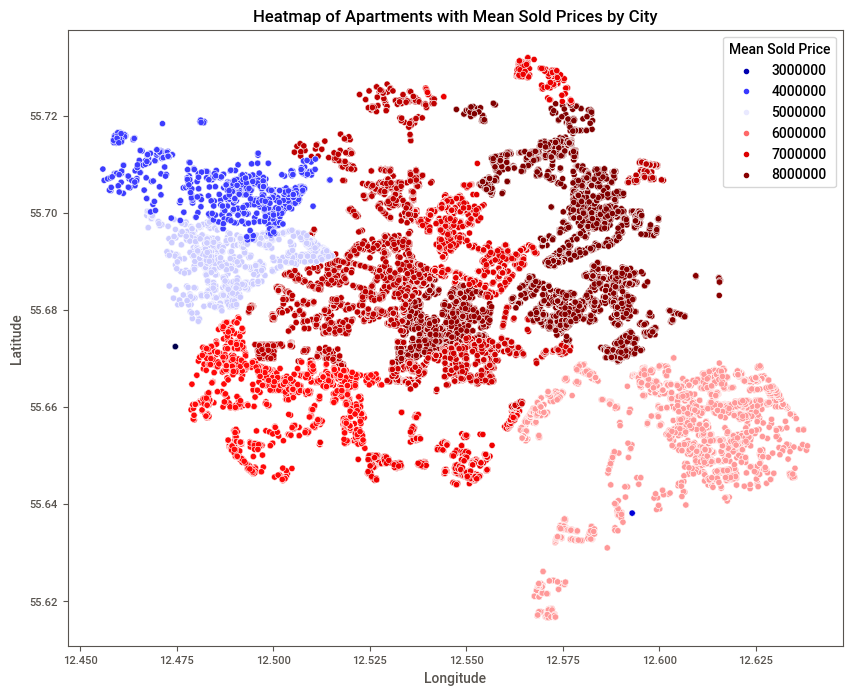

In [206]:
# Step 1: Calculate the mean sold price for each city
mean_prices_city = alm_salg_df.groupby('city')['price'].mean().reset_index()

# Step 2: Merge the mean sold price back into the original DataFrame
alm_salg_df_groupbby_city = alm_salg_df.merge(mean_prices_city, on='city', suffixes=('', '_mean'))

# Step 3: Create a heatmap
plt.figure(figsize=(10, 8))
sns.scatterplot(data=alm_salg_df_groupbby_city, x='longitude', y='latitude', hue='price_mean', palette='seismic', s=20)
plt.title('Heatmap of Apartments with Mean Sold Prices by City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Mean Sold Price', loc='upper right')
plt.savefig('heatmap_meansold.pdf')
plt.show()


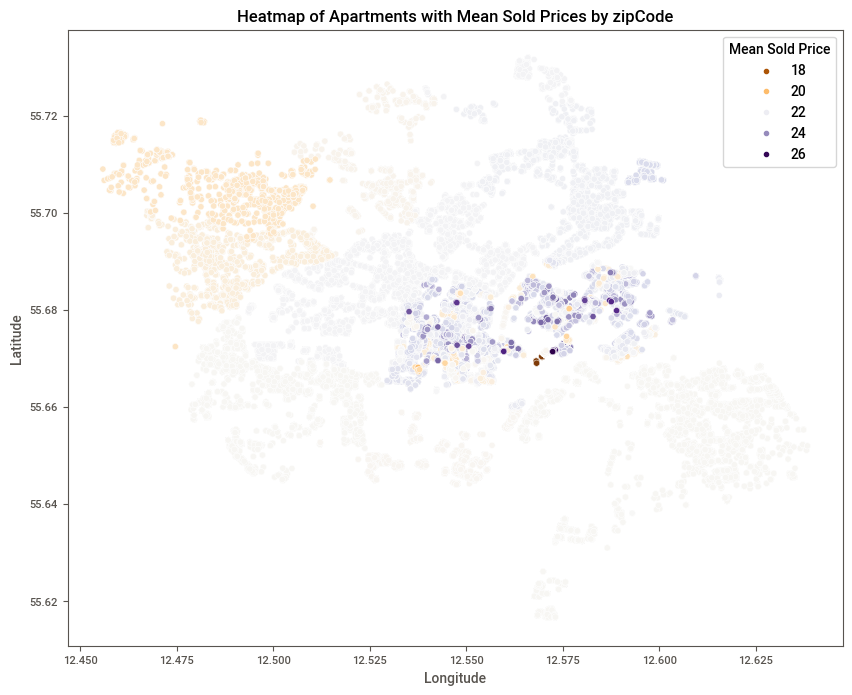

In [207]:
alm_salg_df_zipCode = alm_salg_df.copy()

alm_salg_df_zipCode['price'] = np.log2(alm_salg_df_zipCode['price'])

#Step 1: Calculate the mean sold price for each city
mean_prices_zipCode = alm_salg_df_zipCode.groupby('zipCode')['price'].mean().reset_index()

alm_salg_df_zipCode['price'] = np.exp2(alm_salg_df_zipCode['price'])

# Step 2: Merge the mean sold price back into the original DataFrame
alm_salg_df_groupbby_zipCode = alm_salg_df_zipCode.merge(mean_prices_zipCode, on='zipCode', suffixes=('', '_mean'))

# Step 3: Create a heatmap
plt.figure(figsize=(10, 8))
sns.scatterplot(data=alm_salg_df_groupbby_zipCode, x=('longitude'), y='latitude', hue='price_mean', palette='PuOr', s=20)
plt.title('Heatmap of Apartments with Mean Sold Prices by zipCode')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Mean Sold Price', loc='upper right')
plt.savefig('heatmap_meansold.pdf')
plt.show()


Make this work with the "ipyleaflet: Interactive maps in the Jupyter notebook"


In [208]:
# Create a map centered at a specific location (you can change the coordinates)
center = (latitude, longitude)
m = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)



In [210]:
for index, row in alm_salg_df.sample(100).iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    marker = Marker(location=(latitude, longitude), title=row['address'])
    m.add_layer(marker)


In [211]:
m.add_control(LayersControl())
m

Map(center=[55.665394, 12.533747], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [ ]:
plt.scatter(df['longitude'], df['latitude'], s= .01, alpha=.5, )

In [ ]:
alm_salg_df[['city']].value_counts(normalize=True)

<br>

### Filtering så man sikre sig at Frb kommune salg er med

In [ ]:
df[df['zipCode']==2000]

<br>

### kigger på de borliger der er slogt til mest for at tjekke om filtrering af outliers af boliger der er slogt til mere end 9 mio

In [ ]:
print('top 10 most expencive appartment\n',alm_salg_df['change'].nlargest(10))